# MATH 210 Introduction to Mathematical Computing

## March 30, 2022

* Examples

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## Setup for odeint

To use `scipy.integrate.odeint` to numerically approximate solutions of differential equations, we need to express the system as a first order system in vector form

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(t,\mathbf{u})
$$

where

$$
\mathbf{u} = \begin{bmatrix} u_0 \\ u_1 \\ \vdots \\ u_{n-1} \end{bmatrix}
\hspace{10mm}
\frac{d \mathbf{u}}{dt} = \begin{bmatrix} u'_0 \\ u'_1 \\ \vdots \\ u'_{n-1} \end{bmatrix}
\hspace{10mm}
\mathbf{f}(t,\mathbf{u}) = \begin{bmatrix} f_0(t,u_0,u_1,\dots,u_{n-1}) \\ f_1(t,u_0,u_1,\dots,u_{n-1}) \\ \vdots \\ f_{n-1}(t,u_0,u_1,\dots,u_{n-1}) \end{bmatrix}
$$

## Mass-spring-damper system

The equation of motion of a rigid body (with mass $m$) attached to a spring (with coefficient $k$) and damper (with coefficient $c$) is

$$
mx'' + cx' + kx = g(t)
$$

where $g(t)$ is an external forcing function. Write the equation as a first order system with $u_0 = x$ and $u_1 = x'$:

\begin{align*}
u'_0 &= u_1 \\
u'_1 &= (g(t) - cu_1 - ku_0)/m
\end{align*}

Let's do an example for $m=2$, $c=5$ and $k=20$ with forcing function $g(t) = \cos(5t)$ and initial values $x(0)=x'(0)=0$.

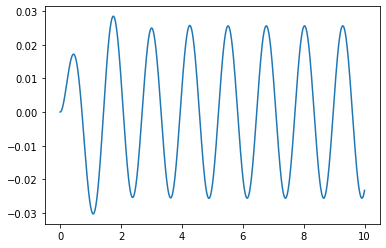

In [3]:
m = 2; c =5; k = 20;
g = lambda t: np.cos(5*t)

def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = (g(t) - c*u[1] - k*u[0])/m
    return dudt

u0 = [0,0]
t = np.linspace(0,10,1000)
U = spi.odeint(f,u0,t)
plt.plot(t,U[:,0])
plt.show()

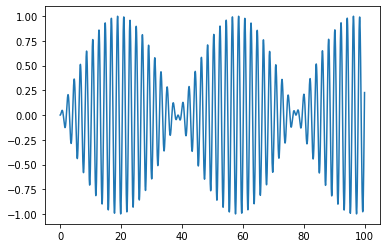

In [4]:
m = 2; c = 0; k = 20;
g = lambda t: np.cos(3*t)

def f(u,t):
    dudt = np.zeros(2)
    dudt[0] = u[1]
    dudt[1] = (g(t) - c*u[1] - k*u[0])/m
    return dudt

u0 = [0,0]; tf = 100;
t = np.linspace(0,tf,100*tf)
U = spi.odeint(f,u0,t)
plt.plot(t,U[:,0])
plt.show()

## SIR model in epidemiology

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) represents a population where:

* $S$ is the susceptible population
* $I$ is the infected population
* $R$ is the removed (by death or recovery) population 

\begin{align*}
\frac{dS}{dt} &= -\frac{\beta IS}{N} \\
\frac{dI}{dt} &= \frac{\beta IS}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I \\
\end{align*}

Let $u_0 = S$, $u_1 = I$, $u_2 = R$, $\beta = 0.2$ and $\gamma = 0.05$.

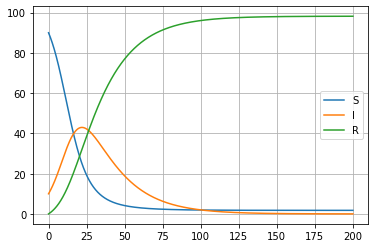

In [5]:
beta = 0.2; gamma = 0.05; N = 100;

def f(u,t):
    dudt = np.zeros(3)
    dudt[0] = -beta*u[1]*u[0]/N
    dudt[1] = beta*u[1]*u[0]/N - gamma*u[1]
    dudt[2] = gamma*u[1]
    return dudt

u0 = [0.9*N,0.1*N,0]; tf = 200;
t = np.linspace(0,tf,100*tf)
U = spi.odeint(f,u0,t)
plt.plot(t,U[:,0],t,U[:,1],t,U[:,2]), plt.legend(['S','I','R']), plt.grid(True)
plt.show()

## Euler's 3-body problem

[Euler's 3-body problem](https://en.wikipedia.org/wiki/Euler%27s_three-body_problem) considers two stars fixed in space and a planet orbiting the stars in 2 dimensions. Use the following units:

* Astronomical units (AU)
* Years
* Solar mass (multiples of the mass of the Earth's Sun)

With these units, the gravitational constant is $G = 4 \pi^2$. Introduce variables for the planet and the stars:

* $m_{S_1}$ - mass of star 1
* $m_{S_2}$ - mass of star 2
* $(x_{S_1},y_{S_1})$ - (fixed) position of star 1
* $(x_{S_2},y_{S_2})$ - (fixed) position of star 2
* $(x_P,y_P)$ - position of the planet

[Newton's Second Law of Motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion) leads to the system of second order differential equations which govern the motion of the planet:

\begin{align}
\frac{d^2x_P}{dt^2} &= - \frac{ G m_{S_1} (x_P - x_{S_1}) }{ ((x_P-x_{S_1})^2 + (y_P-y_{S_1})^2)^{3/2} } - \frac{ G m_{S_2} (x_P - x_{S_2}) }{ ((x_P-x_{S_2})^2 + (y_P-y_{S_2})^2)^{3/2}} \\
\frac{d^2y_P}{dt^2} &= - \frac{ G m_{S_1} (y_P - y_{S_1}) }{ ((x_P-x_{S_1})^2 + (y_P-y_{S_1})^2)^{3/2} } - \frac{ G m_{S_2} (y_P - y_{S_2}) }{ ((x_P-x_{S_2})^2 + (y_P-y_{S_2})^2)^{3/2} }
\end{align}

To plot trajectories of the planet using `odeint`, we first need to write the system as a first order system. Let $u_0 = x_P$, $u_1 = x'_P$, $u_2 = y_P$, $u_3 = y'_P$.

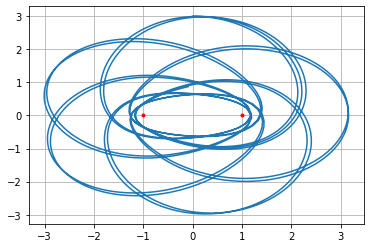

In [11]:
G = 4*np.pi**2
mS1 = 2; mS2 = 1;
xS1 = 1; yS1 = 0;
xS2 = -1; yS2 = 0;

def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = -G*mS1*(u[0] - xS1)/((u[0] - xS1)**2 + (u[2] - yS1)**2)**(3/2) - G*mS2*(u[0] - xS2)/((u[0] - xS2)**2 + (u[2] - yS2)**2)**(3/2)
    dudt[2] = u[3]
    dudt[3] = -G*mS1*(u[2] - yS1)/((u[0] - xS1)**2 + (u[2] - yS1)**2)**(3/2) - G*mS2*(u[2] - yS2)/((u[0] - xS2)**2 + (u[2] - yS2)**2)**(3/2)
    return dudt

tf = 20
t = np.linspace(0,tf,100*tf)
u0 = [0,4.5,3,0]
U = spi.odeint(f,u0,t)
plt.plot(U[:,0],U[:,2])
plt.plot(xS1,yS1,'r.',xS2,yS2,'r.'), plt.grid(True)
plt.show()